# Regularized multinomial logit model (using the LASSO penalty) and preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

%matplotlib inline

In [3]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X = df.drop(["label"], axis=1)
y = df["label"].to_numpy()

In [6]:
# Set random_state to 10 for reproducability. Split 42000: 5000/37000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=10, test_size=37000)

X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

# using saga because lbfgs does not support L1 (lasso) penalty
# tolerance is higher to allow for faster convergence
# cv: folds, C: complexity
LR = LogisticRegressionCV(solver='saga', 
                        multi_class='multinomial', 
                        penalty='l1', 
                        cv=10,
                        tol=0.1, 
                        Cs=100, 
                        random_state=10,
                        verbose=1,
                        n_jobs=-1)

LR_result = LR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 3 epochs took 1 seconds
convergence after 3 epochs took 1 seconds
convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 5 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.7min remaining:  1.1min


convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 3 epochs took 2 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 6 epochs took 2 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


In [32]:
LR_result.scores_[1].mean(axis=0).max()

0.8997829949790009

In [33]:
LR_result.C_

array([200.92330026, 200.92330026, 200.92330026, 200.92330026,
       200.92330026, 200.92330026, 200.92330026, 200.92330026,
       200.92330026, 200.92330026])

In [34]:
LR.score(X_train, y_train)

0.9436

In [35]:
# Test accuracy
score_LR = LR.score(X_test, y_test)
print(score_LR)

0.8982432432432432


In [37]:
LR_result.Cs_

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [43]:
Cs_LR = [1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
       3.35160265e+00, 4.03701726e+00, 4.86260158e+00, 5.85702082e+00,
       7.05480231e+00, 8.49753436e+00, 1.02353102e+01, 1.23284674e+01,
       1.48496826e+01, 1.78864953e+01, 2.15443469e+01, 2.59502421e+01,
       3.12571585e+01, 3.76493581e+01, 4.53487851e+01, 5.46227722e+01,
       6.57933225e+01, 7.92482898e+01, 9.54548457e+01, 1.14975700e+02,
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]


In [47]:
from sklearn.model_selection import validation_curve

param_range_LR = Cs_LR

LR_graph = LogisticRegression(solver='saga', 
                        multi_class='multinomial', 
                        penalty='l1', 
                        tol=0.1, 
                        random_state=10,
                        verbose=0,
                        n_jobs=-1)

train_scores_LR, test_scores_LR = validation_curve(
    LR_graph, X_train, y_train, param_name="C", param_range=param_range_LR,
    cv=10, scoring="accuracy", n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.9min finished


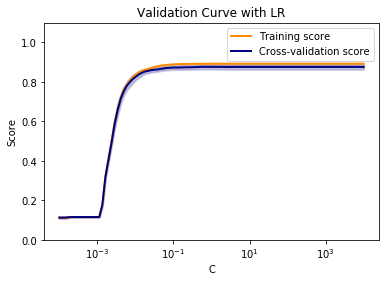

In [51]:
train_scores_LR_mean = np.mean(train_scores_LR, axis=1)
train_scores_LR_std = np.std(train_scores_LR, axis=1)
test_scores_LR_mean = np.mean(test_scores_LR, axis=1)
test_scores_LR_std = np.std(test_scores_LR, axis=1)

plt.title("Validation Curve with LR")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_LR, train_scores_LR_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range_LR, train_scores_LR_mean - train_scores_LR_std,
                 train_scores_LR_mean + train_scores_LR_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_LR, test_scores_LR_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range_LR, test_scores_LR_mean - test_scores_LR_std,
                 test_scores_LR_mean + test_scores_LR_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

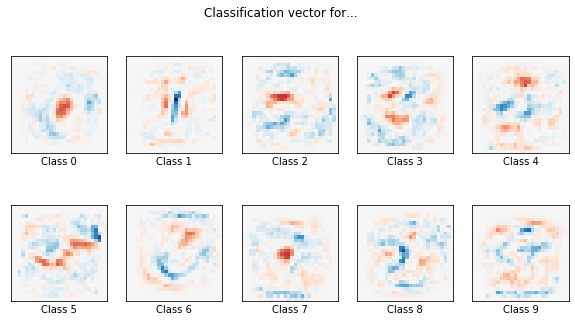

In [21]:
# copied from internet: 
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

coef = LR.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()

# Support vector machines

In [23]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000]
    gammas = [0.0001, 0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, n_jobs=-1, cv=nfolds, verbose=1)
    grid_result = grid.fit(X, y)
    grid.best_params_
    return grid_result

svm_grid_result = svc_param_selection(X_train, y_train, 10)

print("Best: %f using %s" % (svm_grid_result.best_score_, svm_grid_result.best_params_))
means_svm = svm_grid_result.cv_results_['mean_test_score']
stds_svm = svm_grid_result.cv_results_['std_test_score']
params_svm = svm_grid_result.cv_results_['params']
for mean, stdev, param in zip(means_svm, stds_svm, params_svm):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 85 candidates, totalling 850 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 94.5min
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed: 102.1min finished


Best: 0.931200 using {'C': 3, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.0001}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.01}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.1}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 1}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.0001}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.01}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.1}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 1}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 0.0001}
0.309200 (0.011968) with: {'C': 0.01, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 0.01}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 0.1}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 1}
0.612400 (0.017966) with: {'C': 0.1, 'gamma': 0.0001}
0.851000 (0.015574) with: {'C': 0.1, 'gamma': 0.001}
0.313000 (0.006486) with: {'C': 0.1, 'ga

In [27]:
svm_pd_result = pd.concat([pd.DataFrame(svm_grid_result.cv_results_["params"]),pd.DataFrame(svm_grid_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

In [29]:
svm_pd_result.pivot(index="gamma", columns="C", values="Accuracy")

C,0.0001,0.0010,0.0100,0.1000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000,100.0000,1000.0000,10000.0000
gamma,,,,,,,,,,,,,,,,,
0.0001,0.1162,0.1162,0.1162,0.6124,0.8886,0.9030,0.9100,0.9152,0.9176,0.9186,0.9202,0.9206,0.9222,0.9228,0.9158,0.9116,0.9116
0.0010,0.1162,0.1162,0.3092,0.8510,0.9228,0.9284,0.9312,0.9308,0.9312,0.9302,0.9298,0.9296,0.9292,0.9294,0.9294,0.9294,0.9294
0.0100,0.1162,0.1162,0.1162,0.3130,0.7242,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410,0.7410
0.1000,0.1162,0.1162,0.1162,0.1162,0.1778,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810,0.1810
1.0000,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162,0.1162


In [24]:
SVC = SVC(kernel="rbf",
          gamma=0.001,
          C=3,
          random_state=10)

SVC_result = SVC.fit(X_train, y_train)

In [25]:
score_SVM = SVC.score(X_test, y_test)

In [26]:
print(SVC.score(X_train, y_train))
print(score_SVM)

0.9904
0.9322432432432433


In [75]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

SVC_gamma = SVC(kernel="rbf",
          C=3,
          random_state=10)

param_range_svm_gamma = np.logspace(-6, 0, 5)
train_scores_svm_gamma, test_scores_svm_gamma = validation_curve(
    SVC_gamma, X_train, y_train, param_name="gamma", param_range=param_range_svm_gamma,
    cv=10, scoring="accuracy", n_jobs=-1)

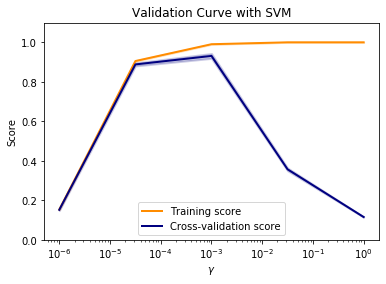

In [76]:
train_scores_svm_gamma_mean = np.mean(train_scores_svm_gamma, axis=1)
train_scores_svm_gamma_std = np.std(train_scores_svm_gamma, axis=1)
test_scores_svm_gamma_mean = np.mean(test_scores_svm_gamma, axis=1)
test_scores_svm_gamma_std = np.std(test_scores_svm_gamma, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range_svm_gamma, train_scores_svm_gamma_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range_svm_gamma, train_scores_svm_gamma_mean - train_scores_svm_gamma_std,
                 train_scores_svm_gamma_mean + train_scores_svm_gamma_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_svm_gamma, test_scores_svm_gamma_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range_svm_gamma, test_scores_svm_gamma_mean - test_scores_svm_gamma_std,
                 test_scores_svm_gamma_mean + test_scores_svm_gamma_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [77]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

SVC_C = SVC(kernel="rbf",
          gamma=0.001,
          random_state=10)

param_range_svm_C = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores_svm_C, test_scores_svm_C = validation_curve(
    SVC_C, X_train, y_train, param_name="C", param_range=param_range_svm_C,
    cv=10, scoring="accuracy", n_jobs=-1)

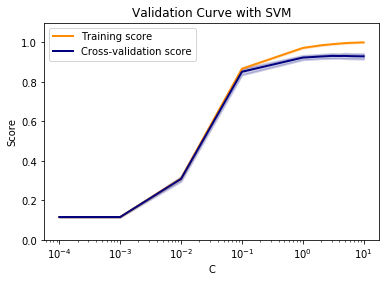

In [78]:
train_scores_svm_C_mean = np.mean(train_scores_svm_C, axis=1)
train_scores_svm_C_std = np.std(train_scores_svm_C, axis=1)
test_scores_svm_C_mean = np.mean(test_scores_svm_C, axis=1)
test_scores_svm_C_std = np.std(test_scores_svm_C, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_svm_C, train_scores_svm_C_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range_svm_C, train_scores_svm_C_mean - train_scores_svm_C_std,
                 train_scores_svm_C_mean + train_scores_svm_C_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range_svm_C, test_scores_svm_C_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range_svm_C, test_scores_svm_C_mean - test_scores_svm_C_std,
                 test_scores_svm_C_mean + test_scores_svm_C_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# Feed-forward neural networks

In [56]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.utils import to_categorical

# Function to create model, required for KerasClassifier
def create_model(neurons=512,
                 regularization=0.001):
    
    # Create model
    model = Sequential()
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(regularization), input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

neurons = [256, 512]
regularization = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

param_grid = dict(neurons=neurons, 
                  regularization=regularization)

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, verbose=1)
# grid_result = grid.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [57]:
final_model = create_model(neurons=512, regularization=0.001)
y_train_cat = to_categorical(y_train, 10)

final_model.fit(X_train, y_train_cat,
                batch_size=128,
                epochs=20,
                verbose=1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





5000/5000 [==============================] - 1s 253us/step - loss: 1.0300 - acc: 0.8436
Epoch 2/20
5000/5000 [==============================] - 0s 99us/step - loss: 0.5212 - acc: 0.9642
Epoch 3/20
5000/5000 [==============================] - 1s 103us/step - loss: 0.4246 - acc: 0.9848
Epoch 4/20
5000/5000 [==============================] - 1s 102us/step - loss: 0.3694 - acc: 0.9914
Epoch 5/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.3321 - acc: 0.9960
Epoch 6/20
5000/5000 [==============================] - 1s 101us/step - loss: 0.3005 - acc: 0.9984
Epoch 7/20
5000/5000 [==============================] - 0s 99us/step - loss: 0.2744 - acc: 0.9990
Epoch 8/20
5000/5000 [==============================] - 0s 98us/step - loss: 0.2527 - acc: 0.9994
Epoch 9/20
5000/5000 [==============================] - 0s 99us/step - loss: 0.2332 - acc: 0.9996
Epoch 

In [74]:
y_test_cat = to_categorical(y_test, 10)

score_NN = final_model.evaluate(X_test, y_test_cat, verbose=0)
print(score_NN[1])

0.9407567567567567


In [59]:
y_train_cat = to_categorical(y_train, 10)

score_NN_train = final_model.evaluate(X_train, y_train_cat, verbose=0)
print(score_NN_train[1])

1.0


# Improved Neural Network for comparison

In [67]:
from keras.layers import Dropout

def create_model_improved(neurons=512,
                 regularization=0.001):
    
    # Create model
    model = Sequential()
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(regularization), input_shape=(784,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model


In [72]:
improved_final_model = create_model_improved(neurons=512, regularization=0.001)

improved_final_model.fit(X_train, y_train_cat,
                batch_size=128,
                epochs=20,
                verbose=1)

Epoch 1/20
5000/5000 [==============================] - 2s 421us/step - loss: 1.3403 - acc: 0.7450
Epoch 2/20
5000/5000 [==============================] - 1s 163us/step - loss: 0.8080 - acc: 0.8826
Epoch 3/20
5000/5000 [==============================] - 1s 166us/step - loss: 0.6650 - acc: 0.9166
Epoch 4/20
5000/5000 [==============================] - 1s 165us/step - loss: 0.5749 - acc: 0.9292
Epoch 5/20
5000/5000 [==============================] - 1s 175us/step - loss: 0.4949 - acc: 0.9430
Epoch 6/20
5000/5000 [==============================] - 1s 170us/step - loss: 0.4587 - acc: 0.9466
Epoch 7/20
5000/5000 [==============================] - 1s 175us/step - loss: 0.4031 - acc: 0.9570
Epoch 8/20
5000/5000 [==============================] - 1s 168us/step - loss: 0.3860 - acc: 0.9578
Epoch 9/20
5000/5000 [==============================] - 1s 169us/step - loss: 0.3542 - acc: 0.9644
Epoch 10/20
5000/5000 [==============================] - 1s 178us/step - loss: 0.3337 - acc: 0.9680
Epoch 11/

In [73]:
score_NN_improved = improved_final_model.evaluate(X_test, y_test_cat, verbose=0)
print(score_NN_improved[1])

0.9375405405405406


# Compare all models

In [57]:
print(f"LR test accuracy: {score_LR}")
print(f"SVM test accuracy: {score_SVM}")
print(f"NN test accuracy: {score_NN[1]}")

LR test accuracy: 0.8982432432432432
SVM test accuracy: 0.9322432432432433
NN test accuracy: 0.9402972972972973


# Significance testing

In [58]:
from sklearn.metrics import confusion_matrix

%matplotlib inline

LR_prediction = LR.predict(X_test)
SVM_prediction = SVC.predict(X_test)
NN_prediction = final_model.predict_classes(X_test)

print(LR_prediction)
print(SVM_prediction)
print(NN_prediction)

[7 3 9 ... 6 1 0]
[7 3 9 ... 6 1 0]
[7 3 9 ... 6 1 0]


In [59]:
def check_correctness(prediction_labels, true_labels):
    correct_list = []
    
    for i, prediction in enumerate(prediction_labels):
        if prediction == true_labels[i]:
                correct_list.append(1)
        else:
            correct_list.append(0)
    
    return correct_list

LR_correctness = check_correctness(LR_prediction, y_test)
SVM_correctness = check_correctness(SVM_prediction, y_test)
NN_correctness = check_correctness(NN_prediction, y_test)

In [60]:
def create_contingency_table(first_correctness, second_correctness):
    correct_correct = 0
    incorrect_correct = 0
    correct_incorrect = 0
    incorrect_incorrect = 0
    
    for i in range(len(first_correctness)):
        if first_correctness[i] == 1 and second_correctness[i] == 1:
            correct_correct += 1
        elif first_correctness[i] == 1 and second_correctness[i] == 0:
            correct_incorrect += 1
        elif first_correctness[i] == 0 and second_correctness[i] == 1:
            incorrect_correct += 1
        elif first_correctness[i] == 0 and second_correctness[i] == 0:
            incorrect_incorrect += 1
                
    return [[correct_correct, correct_incorrect],[incorrect_correct, incorrect_incorrect]]

LR_SVM_contingency = create_contingency_table(LR_correctness, SVM_correctness)
LR_NN_contingency = create_contingency_table(LR_correctness, NN_correctness)
SVM_NN_contingengy = create_contingency_table(SVM_correctness, NN_correctness)

In [61]:
# Example of calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

# calculate mcnemar test
result_LR_SVM = mcnemar(LR_SVM_contingency, exact=True)
result_LR_NN = mcnemar(LR_NN_contingency, exact=True)
result_SVM_NN = mcnemar(SVM_NN_contingengy, exact=True)

alpha = 0.05

# summarize the finding
print("----- McNemar’s Test Statistic ----- \n\n")
print("Contingency tables interpretation: \n[[correct/correct, correct/incorrect][incorrect/correct, incorrect, incorrect]]\n\n")
print("----- LR/SVM")
print(LR_SVM_contingency)
print('statistic=%.3f, p-value=%.3f' % (result_LR_SVM.statistic, result_LR_SVM.pvalue))
if result_LR_SVM.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')
    
print("\n\n-----LR/NN")
print(LR_NN_contingency)
print('statistic=%.3f, p-value=%.3f' % (result_LR_NN.statistic, result_LR_NN.pvalue))
if result_LR_NN.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

print("\n\n-----SVM/NN")
print(SVM_NN_contingengy)
print('statistic=%.3f, p-value=%.3f' % (result_SVM_NN.statistic, result_SVM_NN.pvalue))
if result_SVM_NN.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

----- McNemar’s Test Statistic ----- 


Contingency tables interpretation: 
[[correct/correct, correct/incorrect][incorrect/correct, incorrect, incorrect]]


----- LR/SVM
[[32579, 656], [1914, 1851]]
statistic=656.000, p-value=0.000
Different proportions of errors (reject H0)


-----LR/NN
[[33006, 229], [1785, 1980]]
statistic=229.000, p-value=0.000
Different proportions of errors (reject H0)


-----SVM/NN
[[33944, 549], [847, 1660]]
statistic=549.000, p-value=0.000
Different proportions of errors (reject H0)
